## Cluster Analysis using k-Means
1.	Import libraries & set directory paths
2.	Import dataset and check dimensions and columns.
    -	Import: stone_signs_portal_v6.2_sold_price - 9,312.csv
3.	Exclude categorical variables
4.	Check for nulls and replace with zero.
5.	Apply the Elbow Technique to determine optimum number of clusters
6.	Apply k-means clustering algorithm 
7.	Create plots of a selection of variables to reveal patterns in the data.
8.	Review descriptive statistics
9.	Export to: stone_signs_portal_v6.3_sold_price_cluster - 9,312.csv

### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
# Import the k-means algorithm from scikit-learn.
from sklearn.cluster import KMeans 
# PyLab is a convenience module that bulk imports matplotlib.
import pylab as pl

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [4]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

### import dataset

In [5]:
df_sales = pd.read_csv(os.path.join(dataset,'stone_signs_portal_v6.2_sold_price - 9,312.csv'))
df_sales.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,property_type,new_property,ppd_addr1,ppd_addr2,road_name,locality,town_city,district,county,signs_per_district
0,8371,25/09/2020 13:32,26/09/2020 14:29,1.04,25.0,Truemans,TRU,Truemans @Hove,450,Sales,...,F,N,THEOBALD HOUSE,FLAT 57,BLACKMAN STREET,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281
1,8371,25/09/2020 13:32,26/09/2020 14:29,1.04,25.0,Truemans,TRU,Truemans @Hove,450,Sales,...,F,N,THEOBALD HOUSE,FLAT 61,BLACKMAN STREET,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281
2,6729,01/08/2020 16:18,02/08/2020 10:56,0.78,18.6,Weatherill Property Group,WEA,WeatherillProperty @Hangleton,640,Sales,...,D,N,68,NaN,MILLCROFT,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281
3,6729,05/02/2021 15:00,06/02/2021 11:25,0.85,20.4,Weatherill Property Group,WEA,WeatherillProperty @Hangleton,640,Sales,...,D,N,68,NaN,MILLCROFT,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281
4,5592,30/06/2020 06:49,01/07/2020 10:23,1.15,27.6,John Hoole,JHO,JohnHoole @Brighton,700,Sales,...,F,N,11,GROUND FLOOR FLAT,EXETER STREET,NaN,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,2281


### check dimensions & data types

In [6]:
df_sales.shape

(9312, 61)

In [7]:
df_sales.dtypes

request_id                    int64
request_datetime             object
completed_datetime           object
completed_duration_days     float64
completed_duration_hours    float64
                             ...   
locality                     object
town_city                    object
district                     object
county                       object
signs_per_district            int64
Length: 61, dtype: object

### exclude categorical variables before clustering
    list column names for copy and paste

In [8]:
df_sales.columns

Index(['request_id', 'request_datetime', 'completed_datetime',
       'completed_duration_days', 'completed_duration_hours', 'agent_name',
       'agent_code', 'branch_name', 'branch_code', 'sign_category',
       'sign_action', 'board_type', 'sign_type', 'portal_addr1',
       'portal_addr2', 'portal_addr3', 'town', 'postcode', 'latitude',
       'longitude', 'quantity', 'additional_info', 'request_status',
       'payment_status', 'net_charge', 'vat', 'gross_charge',
       'invoice_datetime', 'paid_datetime', 'payment_duration_days',
       'haversine_distance_miles', 'latitude_group', 'longitude_group', 'zone',
       'zone_area', 'is_up', 'month_no', 'month', 'year', 'work_category',
       'lead_time', 'request_date', 'completed_date', 'invoice_date',
       'paid_date', 'requests_per_day', 'completed_per_day', 'cycle_count',
       'cycle_category', 'sale_price', 'transfer_date', 'property_type',
       'new_property', 'ppd_addr1', 'ppd_addr2', 'road_name', 'locality',
       't

In [9]:
df_sales = df_sales[['completed_duration_days', 'completed_duration_hours', 'branch_code',
'latitude','longitude', 'quantity', 'net_charge', 'payment_duration_days',
'haversine_distance_miles','requests_per_day', 'completed_per_day', 'cycle_count',
'sale_price','signs_per_district']]
df_sales.dtypes

completed_duration_days     float64
completed_duration_hours    float64
branch_code                   int64
latitude                    float64
longitude                   float64
quantity                      int64
net_charge                  float64
payment_duration_days       float64
haversine_distance_miles    float64
requests_per_day              int64
completed_per_day             int64
cycle_count                   int64
sale_price                    int64
signs_per_district            int64
dtype: object

### check for null values

In [10]:
df_sales.isnull().sum()

completed_duration_days      0
completed_duration_hours     0
branch_code                  0
latitude                     0
longitude                    0
quantity                     0
net_charge                   0
payment_duration_days       99
haversine_distance_miles     0
requests_per_day             0
completed_per_day            0
cycle_count                  0
sale_price                   0
signs_per_district           0
dtype: int64

### replace payment_duration_days null values with zero

In [11]:
df_sales['payment_duration_days'] = df_sales['payment_duration_days'].fillna(0)

In [12]:
df_sales.isnull().sum()

completed_duration_days     0
completed_duration_hours    0
branch_code                 0
latitude                    0
longitude                   0
quantity                    0
net_charge                  0
payment_duration_days       0
haversine_distance_miles    0
requests_per_day            0
completed_per_day           0
cycle_count                 0
sale_price                  0
signs_per_district          0
dtype: int64

## Apply the Elbow Technique

### define the range of potential clusters in the data, e.g. 1 to 10

In [13]:
num_cl = range(1, 10)

### define k-means clusters in the range assigned above

In [14]:
kmeans = [KMeans(n_clusters=i) for i in num_cl]

### display the scores

In [15]:
score = [kmeans[i].fit(df_sales).score(df_sales) for i in range(len(kmeans))] 
score

[-270557181483456.3,
 -103513246770356.47,
 -58364490987203.45,
 -36791726719707.73,
 -26200905919468.008,
 -17870712195124.316,
 -12890250209102.324,
 -10117710573479.812,
 -8258865644114.916]

### display as graph using PyLab

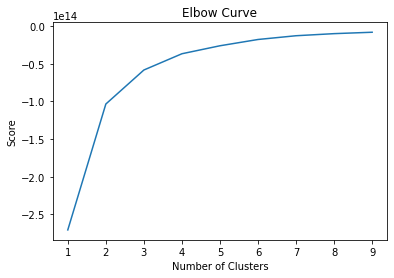

In [16]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The Elbow Technique graph flattens out at 4 clusters, therefore the recommended maximum number of clusters is 4.

## Apply the Clustering Algorithm: k-means

### create the k-means object with 4 clusters
    where n_jobs refers to the priority order in which to run the algorithm,
    as clustering can use much processing power.

In [17]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1)
kmeans

KMeans(n_clusters=4, n_jobs=-1)

### fit the kmeans object to the dataframe to create the clusters

In [18]:
kmeans.fit(df_sales)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

### create a new 'cluster' column for viewing the clustering assigned

In [19]:
df_sales['cluster'] = kmeans.fit_predict(df_sales)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [27]:
df_sales.head()

,completed_duration_days,completed_duration_hours,branch_code,latitude,longitude,quantity,net_charge,payment_duration_days,haversine_distance_miles,requests_per_day,completed_per_day,cycle_count,sale_price,signs_per_district,cluster
0,1.04,25.0,450,50.828855,-0.138262,1,3.85,128.9,3509.499099,75,84,3,147000,2281,3
1,1.04,25.0,450,50.828855,-0.138262,1,3.85,128.9,3509.499099,75,84,3,285000,2281,3
2,0.78,18.6,640,50.861030,-0.167034,1,3.75,22.1,3511.724949,26,26,2,535000,2281,2
3,0.85,20.4,640,50.861030,-0.167034,1,3.75,11.1,3511.724949,58,71,2,535000,2281,2
4,1.15,27.6,700,50.835715,-0.149478,1,3.80,51.7,3509.974371,54,75,2,285000,2281,3


### check the cluster value_counts

In [20]:
df_sales['cluster'].value_counts()

2    3908
0    3570
3    1478
1     356
Name: cluster, dtype: int64

### check values added up to 9,312

In [21]:
3908+3596+1483+325

9312

## Create plots of variables

### Is house price a predictor of how many signs per life cycle?

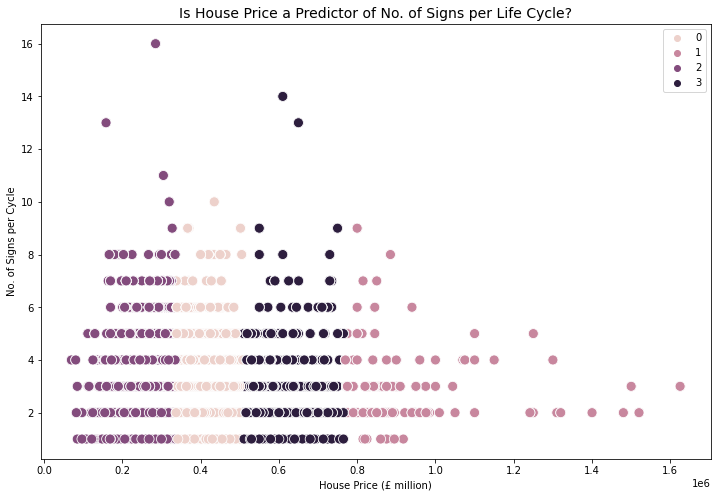

In [36]:
plt.figure(figsize=(12,8))
price_cycle = sns.scatterplot(x= df_sales['sale_price'], y= df_sales['cycle_count'], hue= kmeans.labels_, s=100)

plt.title('Is House Price a Predictor of No. of Signs per Life Cycle?', fontsize=14)
plt.xlabel('House Price (£ million)')
plt.ylabel('No. of Signs per Cycle')

plt.savefig(os.path.join(vizpath,'H2) Is House Price a Predictor of No. of Signs per Life Cycle.png'))

# Subsetting `X` for the x and y arguments to avoid using labels.
# `hue` takes the value of the attribute `kmeans.labels_`
           # which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

#### Observations (left to right):
    - 1st cluster - low-end house price, signs per cycle range from 1 to 16
    - 2nd cluster - low to mid range price, sign per cycle = 1 to 10
    - 3rd cluster - mid to high range price, signs per cycle = 1 to 14
    - 4th cluster - high-end house price, signs per cycle = 1 to 9
#### Conclusion:
The increased number of signs at the low-end price range might indicate a rougher area and sign vandalisum where the sign needs re-erecting, compared to higher-end house prices where there are generally fewer signs.  Other factors to consider are housing near public houses and late night drinking, but also signs poitioned in windy areas such as cliff edges.

### Does location affect the time taken to complete a sign request?
    using Single Point Haversine Distance which is calulated from the latitude and longitude coordinates, to a single value.

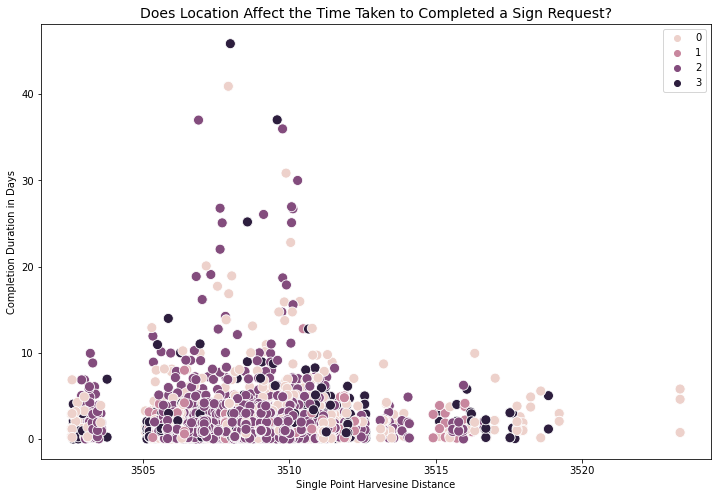

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x= df_sales['haversine_distance_miles'], y= df_sales['completed_duration_days'], hue= kmeans.labels_, s=100)

plt.title('Does Location Affect the Time Taken to Completed a Sign Request?', fontsize=14)
plt.xlabel('Single Point Harvesine Distance') 
plt.ylabel('Completion Duration in Days')

plt.savefig(os.path.join(vizpath,'H1a) Does Location Affect the Time Taken to Completed a Sign Request.png'))

# Subsetting `X` for the x and y arguments to avoid using labels.
# `hue` takes the value of the attribute `kmeans.labels_`
           # which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

There does not appear to be any defined clusters.

### Does the number of signs per district affect the time take to completed a sign request?

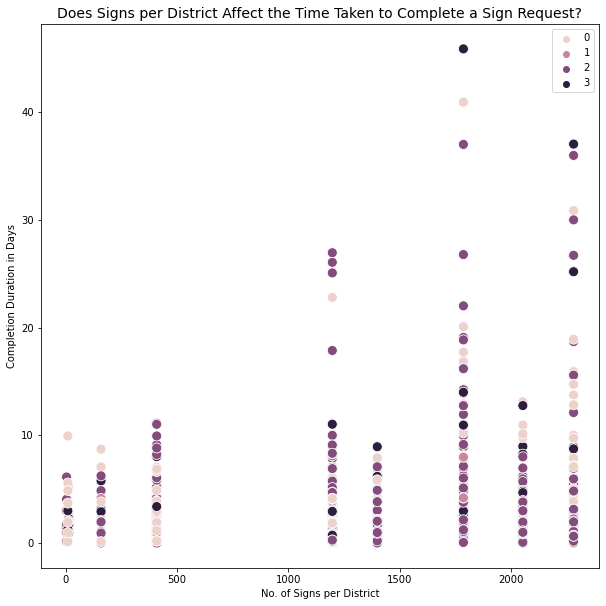

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= df_sales['signs_per_district'], y= df_sales['completed_duration_days'], hue= kmeans.labels_, s=100)

plt.title('Does Signs per District Affect the Time Taken to Complete a Sign Request?', fontsize=14)
plt.xlabel('No. of Signs per District') 
plt.ylabel('Completion Duration in Days')
plt.savefig(os.path.join(vizpath,'H1a) Does Signs per District affect the Time Taken to Complete a Sign Request.png'))

### Does the number of signs per district affect how many signs are completed per day?

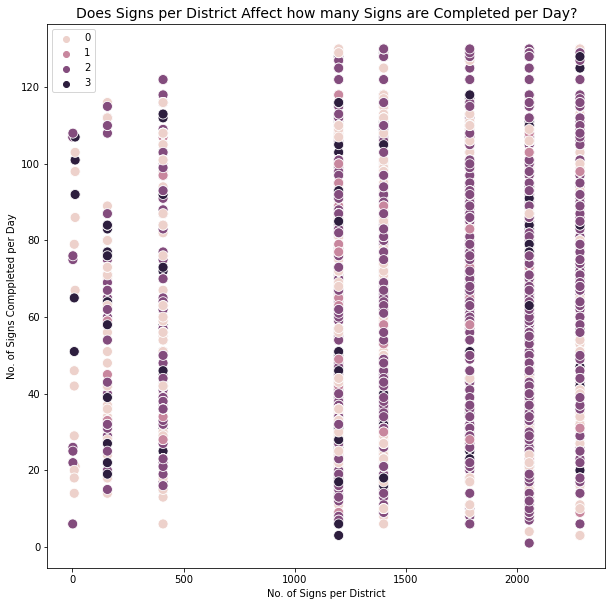

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= df_sales['signs_per_district'], y= df_sales['completed_per_day'], hue= kmeans.labels_, s=100)

plt.title('Does Signs per District Affect how many Signs are Completed per Day?', fontsize=14)
plt.xlabel('No. of Signs per District') 
plt.ylabel('No. of Signs Comppleted per Day')
plt.savefig(os.path.join(vizpath,'H1b) Does Signs per District Affect how many Signs are Completed per Day.png'))

There does not appear to be any defined clusters.  

Further experimentation with a range of variables shows that the data does not lend itself well to clustering.

### create cluster_colour label column & review statistics for sale_price and cycle_count

In [33]:
df_sales.loc[df_sales['cluster'] == 0, 'cluster_colour'] = 'Pink'
df_sales.loc[df_sales['cluster'] == 1, 'cluster_colour'] = 'Mauve'
df_sales.loc[df_sales['cluster'] == 2, 'cluster_colour'] = 'Purple'
df_sales.loc[df_sales['cluster'] == 3, 'cluster_colour'] = 'Dark Purple'
df_sales.head()

,completed_duration_days,completed_duration_hours,branch_code,latitude,longitude,quantity,net_charge,payment_duration_days,haversine_distance_miles,requests_per_day,completed_per_day,cycle_count,sale_price,signs_per_district,cluster,cluster_colour
0,1.04,25.0,450,50.828855,-0.138262,1,3.85,128.9,3509.499099,75,84,3,147000,2281,2,Purple
1,1.04,25.0,450,50.828855,-0.138262,1,3.85,128.9,3509.499099,75,84,3,285000,2281,2,Purple
2,0.78,18.6,640,50.861030,-0.167034,1,3.75,22.1,3511.724949,26,26,2,535000,2281,3,Dark Purple
3,0.85,20.4,640,50.861030,-0.167034,1,3.75,11.1,3511.724949,58,71,2,535000,2281,3,Dark Purple
4,1.15,27.6,700,50.835715,-0.149478,1,3.80,51.7,3509.974371,54,75,2,285000,2281,2,Purple


### groupby cluster_colour and display statistics

In [37]:
df_sales.groupby('cluster_colour') [['sale_price','cycle_count']].mean()

,sale_price,cycle_count
cluster_colour,,
Dark Purple,608641.452639,3.448579
Mauve,926012.800562,3.584270
Pink,408660.383754,3.424930
Purple,265514.484903,3.427840


In [38]:
df_sales.groupby('cluster_colour') [['sale_price','cycle_count']].median()

,sale_price,cycle_count
cluster_colour,,
Dark Purple,600000,3
Mauve,865000,3
Pink,400000,3
Purple,277500,3


#### Statistics observations:
   It appears that the price that a house is sold for has little affect on how many signs will be placed at the property, meaning that it is not possible to anticipate how many signs will be required at a property based on the market price.

### export to CSV

In [40]:
df_sales.shape

(9312, 16)

In [41]:
df_sales.to_csv(os.path.join(dataset,'stone_signs_portal_v6.3_sold_price_cluster - 9,312.csv'), index=False)